In [57]:
import tensorflow as tf 
import numpy as np
class Model(object):
  def __init__(self):
    # Initialize the weights to `2.0` and the bias to `1.0`
    # In practice, these should be initialized to random values (for example, with `tf.random.normal`)
    self.w = tf.Variable(2.0)
    self.b = tf.Variable(1.0)

  def __call__(self, x):
    return self.w * x + self.b

model = Model()
    
True_w = 3.0
True_b = 2.0
NUM_EXAMPLES = 1000

xs  = tf.random.normal(shape=[NUM_EXAMPLES])

ys = (True_w * xs) + True_b

In [58]:
ys

<tf.Tensor: shape=(1000,), dtype=float32, numpy=
array([ 1.9408810e+00,  7.3122988e+00, -2.2546706e+00,  2.9979067e+00,
        1.7702721e+00,  4.9127951e+00, -8.4348679e-02,  2.3329737e+00,
        4.8604918e+00,  3.4717541e+00, -1.7434807e+00,  3.2836354e+00,
        1.2604960e+00,  3.4528530e+00, -4.0768070e+00, -4.4497013e-01,
        3.0591927e+00,  4.0705466e+00,  4.8183184e+00,  4.3000860e+00,
        7.4526894e-01,  3.0710380e+00,  2.8820252e-01,  3.2399917e+00,
        5.2334952e+00,  1.6179817e+00,  2.3347125e+00,  8.0636549e-01,
        5.4177685e+00, -1.8589659e+00,  1.2414483e+00, -2.8745556e+00,
        5.7487741e+00,  1.9226739e+00,  5.2685313e+00, -5.7482243e-01,
        2.1718874e+00,  2.6391299e+00,  1.0823783e+00,  1.8442748e+00,
        4.9999866e+00,  7.8766651e+00, -2.3059845e-01,  5.0137892e+00,
       -1.2332330e+00, -1.2936549e+00,  3.8800485e+00, -4.2314959e+00,
       -1.2868326e+00,  2.4909759e-01, -1.3227110e+00,  8.5741568e-01,
        3.3480456e+00,  8.79

In [71]:
# Mean Sequared loss
def loss(y_true,y_pred):
    return tf.reduce_mean(tf.square(y_true-y_pred))

In [72]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  dw, db = t.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

  return current_loss

In [73]:
import matplotlib.pyplot as plt
model=Model()

In [74]:
def plot_data(inputs,outputs, predicted_outputs):
    real=plt.scatter(inputs, outputs,c="b")
    predicted=plt.scatter(inputs,predicted_outputs, c="r")
    plt.legend((real, predicted),("Real Data", "Predicted Data"))
    plt.show()

In [75]:
model = Model()

# Collect the history of W-values and b-values to plot later
list_w, list_b = [], []
epochs = range(15)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, xs, ys, learning_rate=0.1)
  losses.append(current_loss)
  print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, list_w[-1], list_b[-1], current_loss))

Epoch  0: w=2.00 b=1.00, loss=1.80581
Epoch  1: w=2.17 b=1.19, loss=1.21195
Epoch  2: w=2.32 b=1.34, loss=0.81360
Epoch  3: w=2.44 b=1.46, loss=0.54631
Epoch  4: w=2.54 b=1.56, loss=0.36691
Epoch  5: w=2.62 b=1.64, loss=0.24648
Epoch  6: w=2.68 b=1.71, loss=0.16561
Epoch  7: w=2.74 b=1.76, loss=0.11129
Epoch  8: w=2.79 b=1.81, loss=0.07481
Epoch  9: w=2.82 b=1.84, loss=0.05029
Epoch 10: w=2.85 b=1.87, loss=0.03381
Epoch 11: w=2.88 b=1.90, loss=0.02274
Epoch 12: w=2.90 b=1.92, loss=0.01529
Epoch 13: w=2.92 b=1.93, loss=0.01028
Epoch 14: w=2.93 b=1.94, loss=0.00692


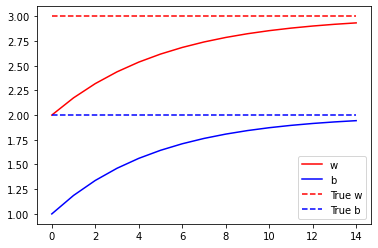

In [76]:
plt.plot(epochs, list_w, 'r',
       epochs, list_b, 'b')
plt.plot([True_w] * len(epochs), 'r--',
      [True_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()

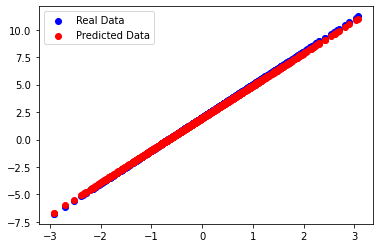

In [77]:
test_inputs  = tf.random.normal(shape=[Num_examples])
test_outputs = test_inputs * True_w + True_b

predicted_test_outputs = model(test_inputs)
plot_data(test_inputs, test_outputs, predicted_test_outputs)

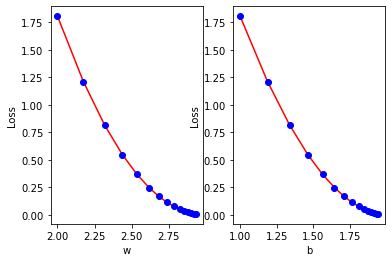

In [78]:
def plot_loss_for_weights(weights_list, losses):
  for idx, weights in enumerate(weights_list):
    plt.subplot(120 + idx + 1)
    plt.plot(weights['values'], losses, 'r')
    plt.plot(weights['values'], losses, 'bo')
    plt.xlabel(weights['name'])
    plt.ylabel('Loss')
    
    
weights_list = [{ 'name' : "w",
                  'values' : list_w
                },
                {
                  'name' : "b",
                  'values' : list_b
                }]

plot_loss_for_weights(weights_list, losses)